In [7]:
import os
import numpy as np
import pandas as pd
import re
import tools as tl

## Overview of model runs

In [59]:
topDirectory = "./output/"#os.getcwd()
files = [path+'/'+file for path, d, f 
         in os.walk(topDirectory) 
         for file in f if file.endswith(".csv")]
overviewOfRuns = pd.concat([pd.DataFrame([np.array(re.split('[a-z-/.]+',files[n])[1:-1])]) 
           for n in range(0,len(files))])
overviewOfRuns.columns = ['Rows', 'Columns', 'Grid Option', 'Grazing',
                  'Initial Coral Percent', 'Initial Macroalgae Percent',
                      'r', 'd', 'a', 'y', 'Time', 'Record Rate', 'Number of Simulations']
overviewOfRuns = overviewOfRuns.set_index([pd.Series([n for n in range(0,len(files))])])
overviewOfRuns

,Rows,Columns,Grid Option,Grazing,Initial Coral Percent,Initial Macroalgae Percent,r,d,a,y,Time,Record Rate,Number of Simulations
0,15,15,0,60,33,33,10,40,20,75,5010,200,100
1,15,15,0,50,33,33,10,40,20,75,5010,500,100
2,15,15,0,50,33,33,10,40,20,75,5010,200,100
3,15,15,0,40,33,33,10,40,20,75,5010,200,100
4,15,15,0,70,33,33,10,40,20,75,5010,200,100
5,15,15,0,55,33,33,10,40,20,75,5010,500,100
6,15,15,0,30,33,33,10,40,20,75,5010,200,100
7,15,15,2,50,33,33,10,40,20,75,5010,500,100
8,15,15,2,55,33,33,10,40,20,75,5010,500,100
9,20,20,0,50,33,33,10,40,20,75,5010,500,100


## Choose Runs to Explore

In [60]:
filesOfInterest = [1,7,5,8]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above
#labels = 

In [61]:
## will rewrite this list comprehension to make it neater
coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])

In [62]:
coralData

,Simulation,Timestep,CoralCount,TurfCount,MacroalgaeCount,Coral-CoralNeighbors,Turf-TurfNeighbors,Macro-MacroNeighbors,CoralPatchCount,AlgaePatchCount,TurfPatchCount,MacroPatchCount,File
0,0,0,67,85,73,0.29,0.43,0.31,12,1,15,14,1
1,0,500,2,87,136,0.12,0.47,0.66,1,1,6,1,1
2,0,1000,0,75,150,0.00,0.38,0.67,1,1,8,2,1
3,0,1500,0,82,143,0.00,0.45,0.69,1,1,10,2,1
4,0,2000,0,71,154,0.00,0.36,0.71,1,1,16,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,99,3000,123,77,25,0.64,0.37,0.35,3,4,6,5,8
1096,99,3500,169,46,10,0.77,0.20,0.44,1,19,22,3,8
1097,99,4000,169,56,0,0.77,0.29,0.00,1,15,15,1,8
1098,99,4500,182,43,0,0.84,0.29,0.00,1,13,13,1,8


## Plot chosen Runs

### Coral Node Count v Time, Ordered by Model Runs

File
1    AxesSubplot(0.125,0.125;0.62x0.755)
5    AxesSubplot(0.125,0.125;0.62x0.755)
7    AxesSubplot(0.125,0.125;0.62x0.755)
8    AxesSubplot(0.125,0.125;0.62x0.755)
dtype: object

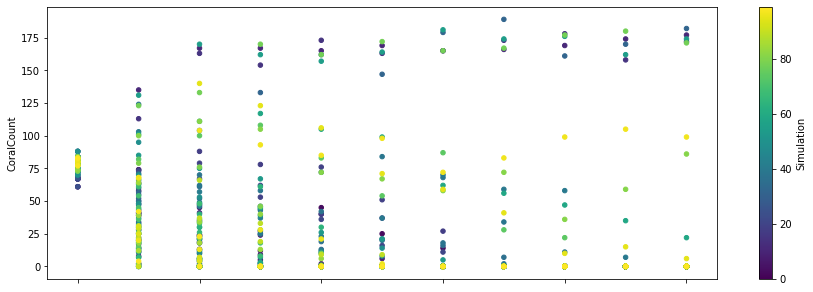

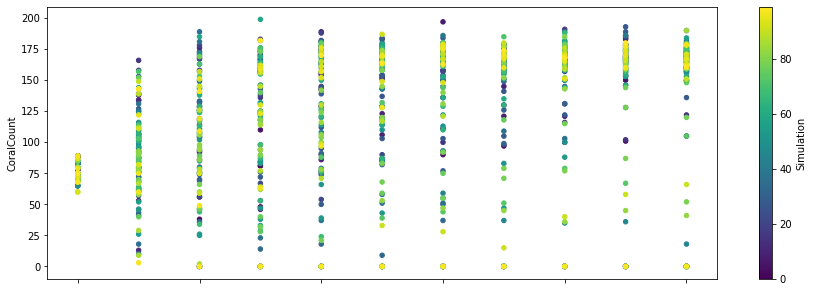

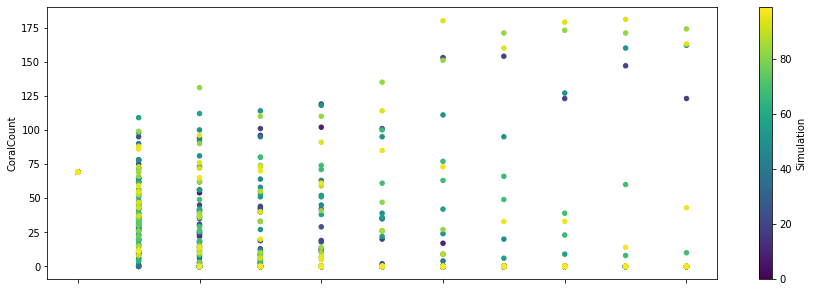

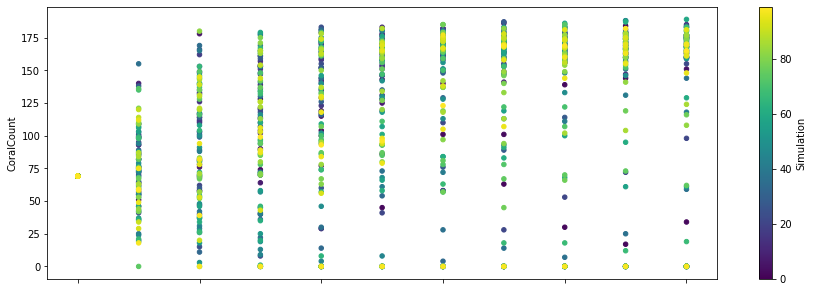

In [63]:
coralData.groupby(['File']).plot.scatter(x='Timestep', y='CoralCount', c='Simulation', figsize=(15,5), colormap='viridis')

### Count v Coral Node Count, Ordered by Model Runs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a200b3390>,
      dtype=object)

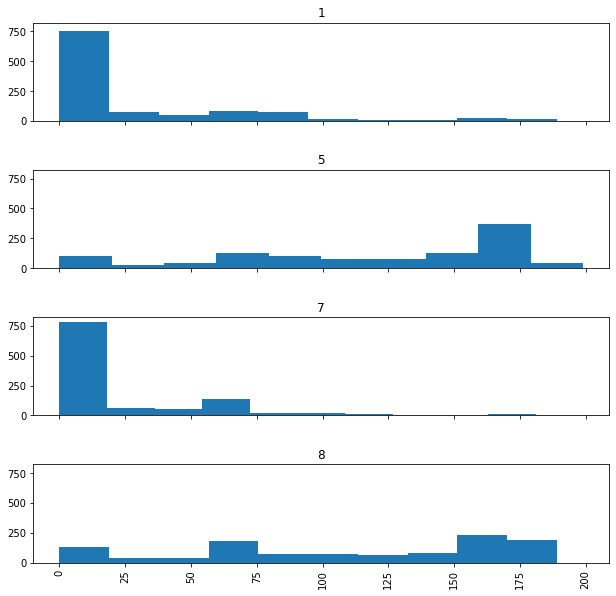

In [64]:
coralData.hist(column='CoralCount', by='File', figsize=(10,10), layout=(len(filesOfInterest),1), sharex=True, sharey=True)

### Coral-Coral Neighbors v Coral Patch Count

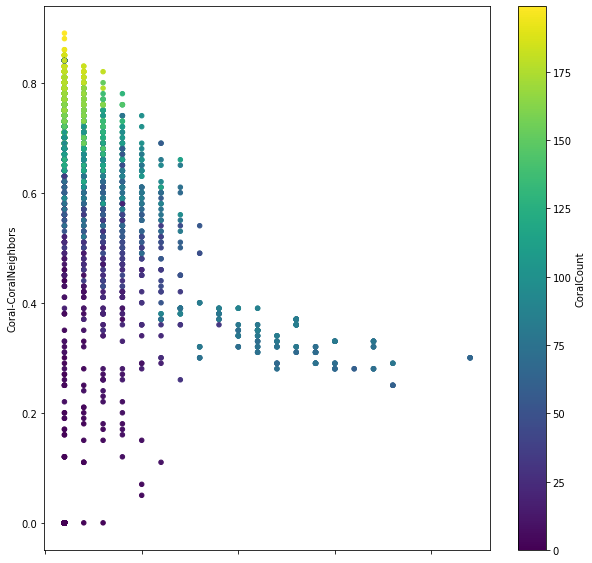

In [65]:
coralData.plot.scatter(x= 'CoralPatchCount', y='Coral-CoralNeighbors', c='CoralCount', colormap='viridis', figsize=(10,10))

# Exploring Variations in Grid Size / Initial Dist. and Grazing

In [37]:
overviewOfRuns

,Rows,Columns,Grid Option,Grazing,Initial Coral Percent,Initial Macroalgae Percent,r,d,a,y,Time,Record Rate,Number of Simulations
0,15,15,0,60,33,33,10,40,20,75,5010,200,100
1,15,15,0,50,33,33,10,40,20,75,5010,500,100
2,15,15,0,50,33,33,10,40,20,75,5010,200,100
3,15,15,0,40,33,33,10,40,20,75,5010,200,100
4,15,15,0,70,33,33,10,40,20,75,5010,200,100
5,15,15,0,55,33,33,10,40,20,75,5010,500,100
6,15,15,0,30,33,33,10,40,20,75,5010,200,100
7,15,15,2,50,33,33,10,40,20,75,5010,500,100
8,15,15,2,55,33,33,10,40,20,75,5010,500,100
9,20,20,0,50,33,33,10,40,20,75,5010,500,100


## 15 X 15 Grazing 30, 40, 50, 60, 70

In [72]:
filesOfInterest = [6, 3, 2, 0, 4]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above

coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(overviewOfRuns['Grazing'][f], len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])

labels = [overviewOfRuns['Grazing'][index] for index in filesOfInterest]

File
30    AxesSubplot(0.125,0.125;0.62x0.755)
40    AxesSubplot(0.125,0.125;0.62x0.755)
50    AxesSubplot(0.125,0.125;0.62x0.755)
60    AxesSubplot(0.125,0.125;0.62x0.755)
70    AxesSubplot(0.125,0.125;0.62x0.755)
dtype: object

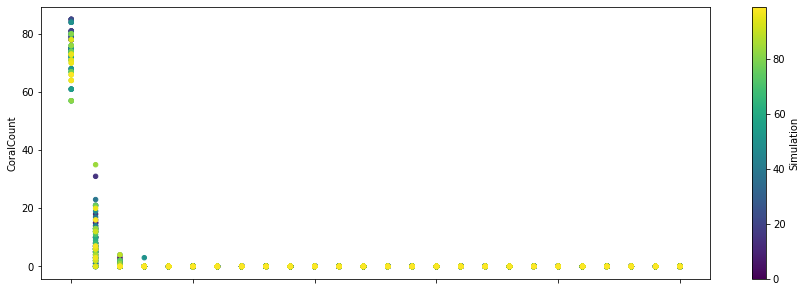

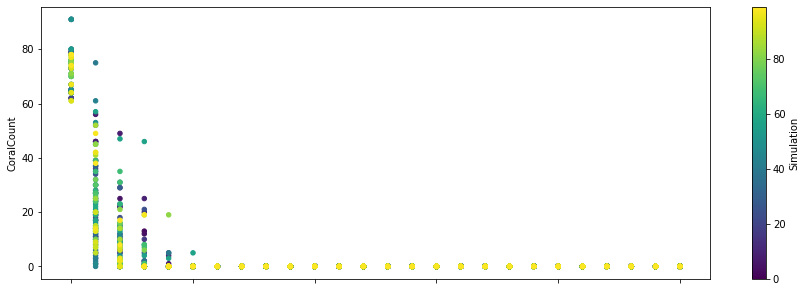

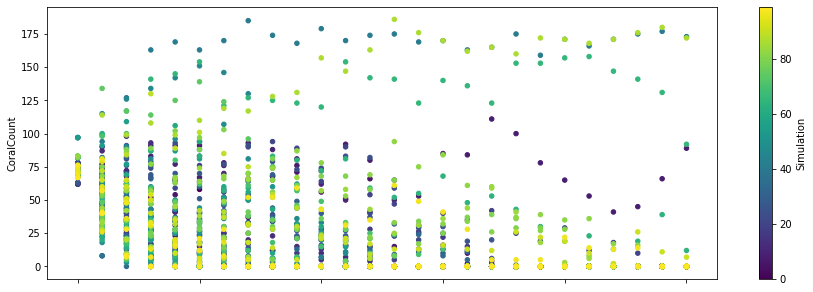

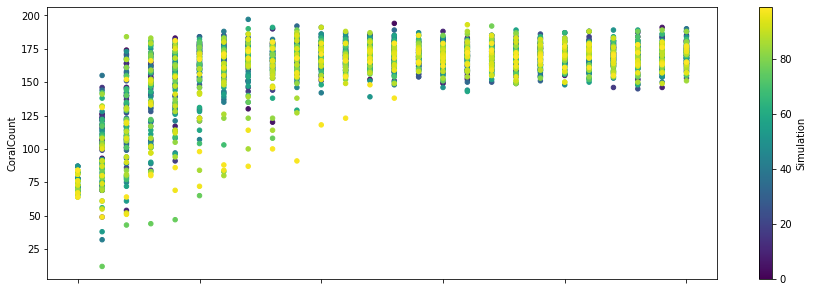

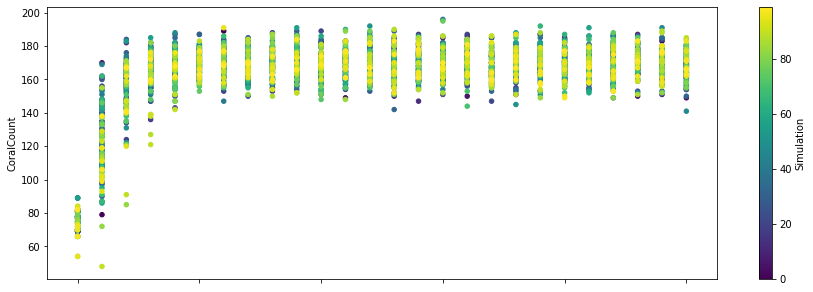

In [67]:
coralData.groupby(['File']).plot.scatter(x='Timestep', y='CoralCount', c='Simulation',
                                         figsize=(15,5), colormap='viridis')

File
30    AxesSubplot(0.125,0.125;0.62x0.755)
40    AxesSubplot(0.125,0.125;0.62x0.755)
50    AxesSubplot(0.125,0.125;0.62x0.755)
60    AxesSubplot(0.125,0.125;0.62x0.755)
70    AxesSubplot(0.125,0.125;0.62x0.755)
dtype: object

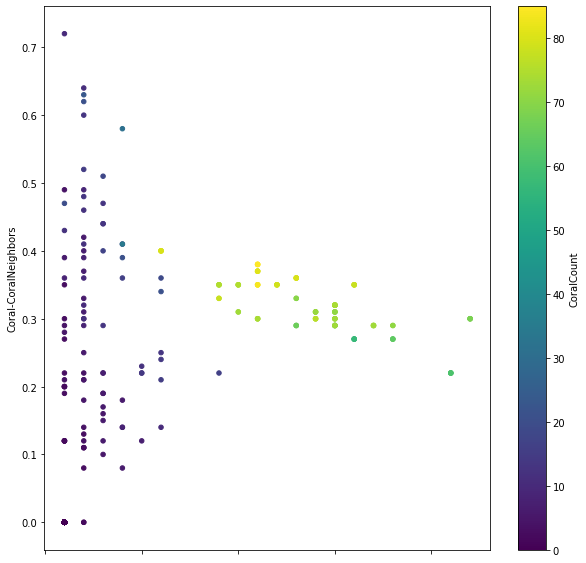

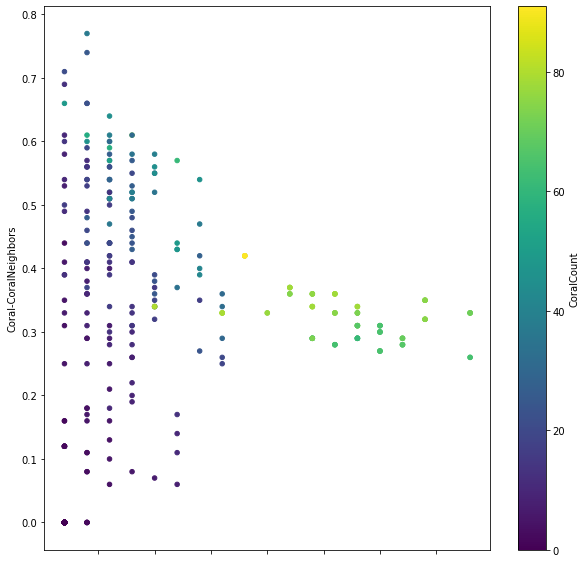

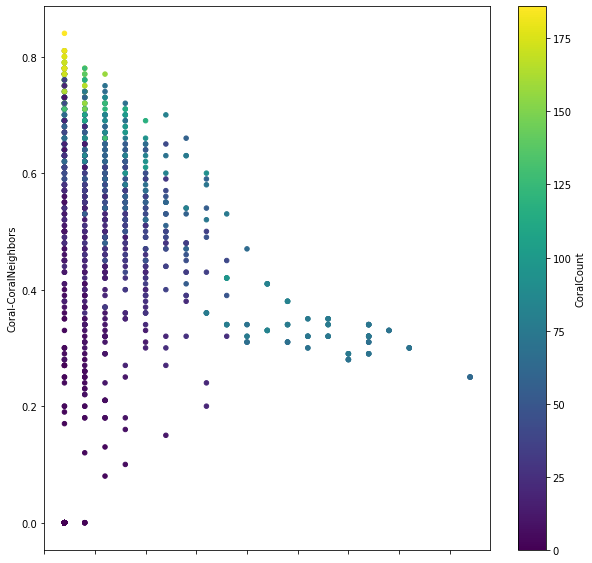

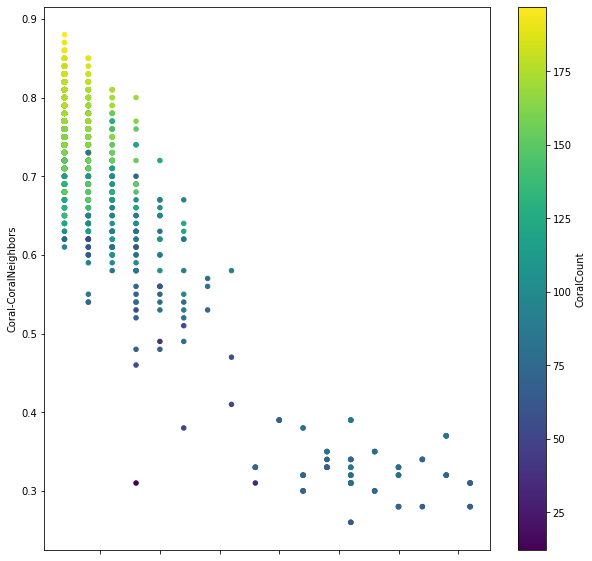

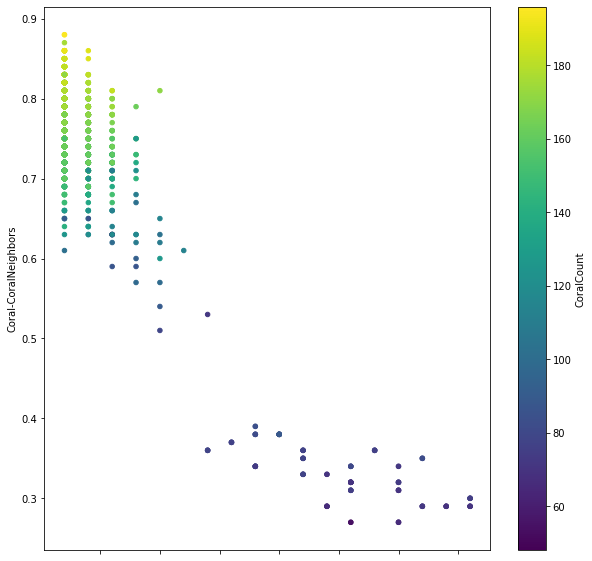

In [74]:
coralData.groupby(['File']).plot.scatter(x= 'CoralPatchCount', y='Coral-CoralNeighbors', c='CoralCount', colormap='viridis', figsize=(10,10))

## 15 X 15, Grazing: 50, 55, Grid Option: Random, Blob

In [78]:
filesOfInterest = [1,7]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above

coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])

#labels = [overviewOfRuns['Grazing'][index] + ' ' overviewOfRuns['Grazing'][index]  for index in filesOfInterest]

overviewOfRuns.iloc[filesOfInterest,]

,Rows,Columns,Grid Option,Grazing,Initial Coral Percent,Initial Macroalgae Percent,r,d,a,y,Time,Record Rate,Number of Simulations
1,15,15,0,50,33,33,10,40,20,75,5010,500,100
7,15,15,2,50,33,33,10,40,20,75,5010,500,100


File
5    AxesSubplot(0.125,0.125;0.62x0.755)
8    AxesSubplot(0.125,0.125;0.62x0.755)
dtype: object

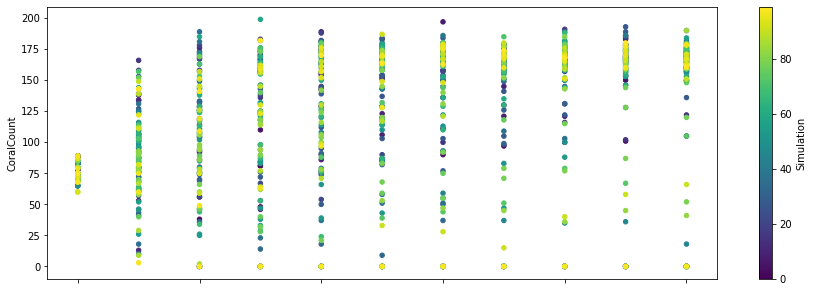

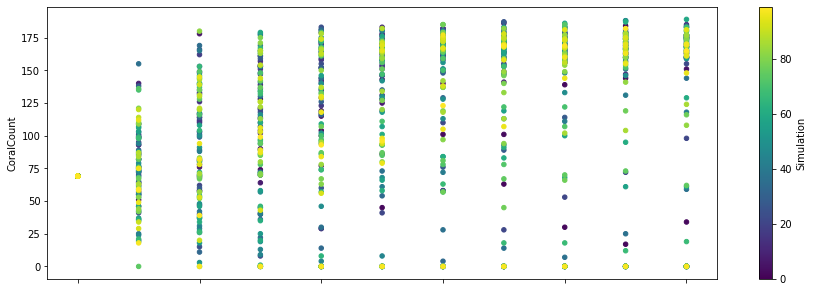

In [84]:
coralData.groupby(['File']).plot.scatter(x='Timestep', y='CoralCount', c='Simulation',
                                         figsize=(15,5), colormap='viridis')

In [80]:
filesOfInterest = [5,8]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above

coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])

#labels = [overviewOfRuns['Grazing'][index] + ' ' overviewOfRuns['Grazing'][index]  for index in filesOfInterest]

overviewOfRuns.iloc[filesOfInterest,]

,Rows,Columns,Grid Option,Grazing,Initial Coral Percent,Initial Macroalgae Percent,r,d,a,y,Time,Record Rate,Number of Simulations
5,15,15,0,55,33,33,10,40,20,75,5010,500,100
8,15,15,2,55,33,33,10,40,20,75,5010,500,100


File
5    AxesSubplot(0.125,0.125;0.62x0.755)
8    AxesSubplot(0.125,0.125;0.62x0.755)
dtype: object

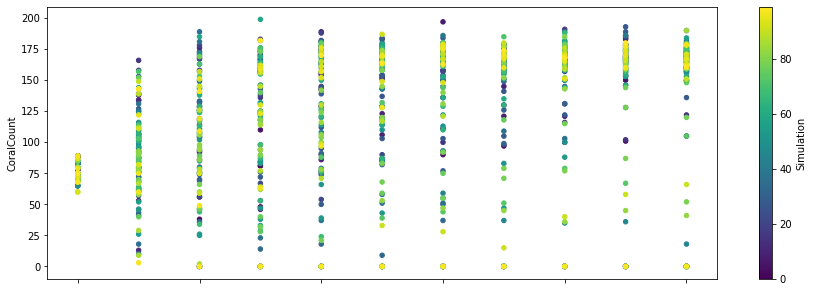

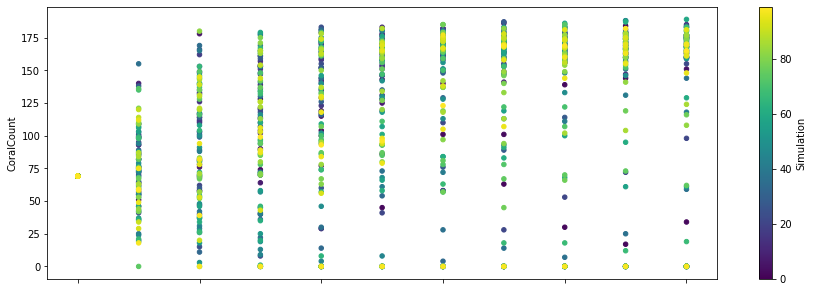

In [81]:
coralData.groupby(['File']).plot.scatter(x='Timestep', y='CoralCount', c='Simulation',
                                         figsize=(15,5), colormap='viridis')

File
5    AxesSubplot(0.125,0.125;0.62x0.755)
8    AxesSubplot(0.125,0.125;0.62x0.755)
dtype: object

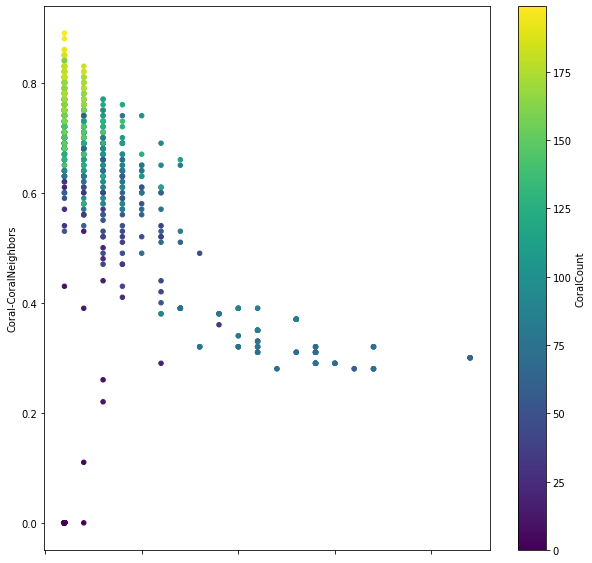

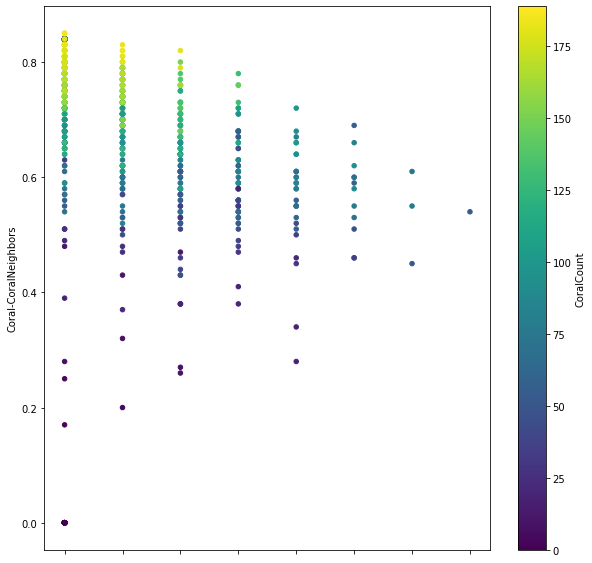

In [82]:
coralData.groupby(['File']).plot.scatter(x= 'CoralPatchCount', y='Coral-CoralNeighbors', c='CoralCount', colormap='viridis', figsize=(10,10))

## 20 X 20, Grazing: 50, 55, Grid Option: Random, Blob

In [85]:
filesOfInterest = [9,11]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above

coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])

#labels = [overviewOfRuns['Grazing'][index] + ' ' overviewOfRuns['Grazing'][index]  for index in filesOfInterest]

overviewOfRuns.iloc[filesOfInterest,]

,Rows,Columns,Grid Option,Grazing,Initial Coral Percent,Initial Macroalgae Percent,r,d,a,y,Time,Record Rate,Number of Simulations
9,20,20,0,50,33,33,10,40,20,75,5010,500,100
11,20,20,2,50,33,33,10,40,20,75,5010,500,100


File
9     AxesSubplot(0.125,0.125;0.62x0.755)
11    AxesSubplot(0.125,0.125;0.62x0.755)
dtype: object

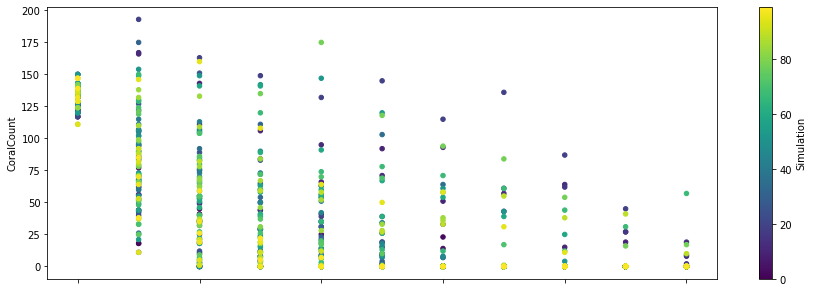

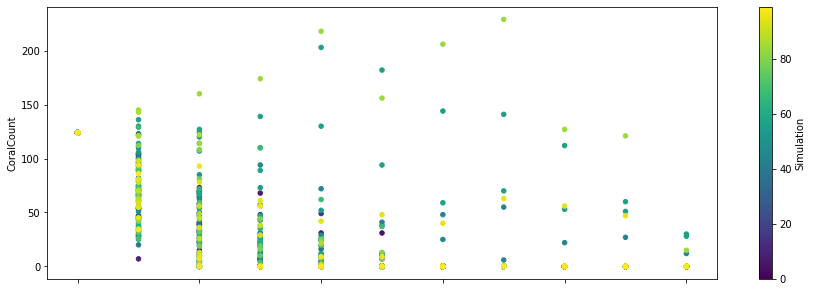

In [86]:
coralData.groupby(['File']).plot.scatter(x='Timestep', y='CoralCount', c='Simulation',
                                         figsize=(15,5), colormap='viridis')

In [87]:
filesOfInterest = [10,12]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above

coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])

#labels = [overviewOfRuns['Grazing'][index] + ' ' overviewOfRuns['Grazing'][index]  for index in filesOfInterest]

overviewOfRuns.iloc[filesOfInterest,]

,Rows,Columns,Grid Option,Grazing,Initial Coral Percent,Initial Macroalgae Percent,r,d,a,y,Time,Record Rate,Number of Simulations
10,20,20,0,55,33,33,10,40,20,75,5010,500,100
12,20,20,2,55,33,33,10,40,20,75,5010,500,100


File
10    AxesSubplot(0.125,0.125;0.62x0.755)
12    AxesSubplot(0.125,0.125;0.62x0.755)
dtype: object

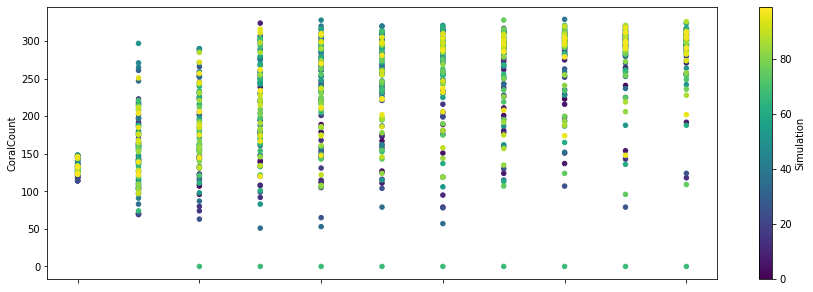

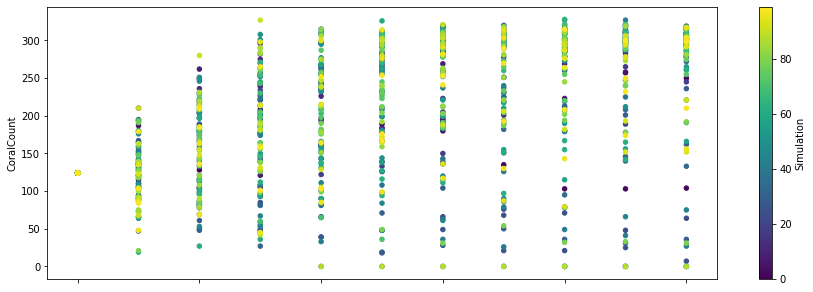

In [88]:
coralData.groupby(['File']).plot.scatter(x='Timestep', y='CoralCount', c='Simulation',
                                         figsize=(15,5), colormap='viridis')